## Python imports

In [1]:
import scipy as sp
from scipy.integrate import odeint

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

## Define rate vector

$$ 
r_{A}	=-k_{1}c_{A}-2k_{3}c_{A}^{2} \\
r_{B}	=k_{1}c_{A}-k_{2}c_{B}
$$

In [2]:
def rate_fn(c, t):
    
    cA = c[0]
    cB = c[1]
    
    # rate constants
    k1 = 1.0
    k2 = 1.0
    k3 = 10.0
    
    # component rate expressions
    rA = -k1*cA - 2*k3*(cA**2)
    rB = k1*cA - k2*cB
    
    return sp.array([rA, rB])

## Integrate PFR

In [3]:
# feed vector
Cf = sp.array([1.0, 0.0])

# PFR integration times
t_PFR = 10.0
ts = sp.logspace(-4, sp.log10(t_PFR), 50)

# integrate PFR
pfr_cs = odeint(rate_fn, Cf, ts)

# Plot PFR trajectory in $c_{A}$-$c_{B}$ space

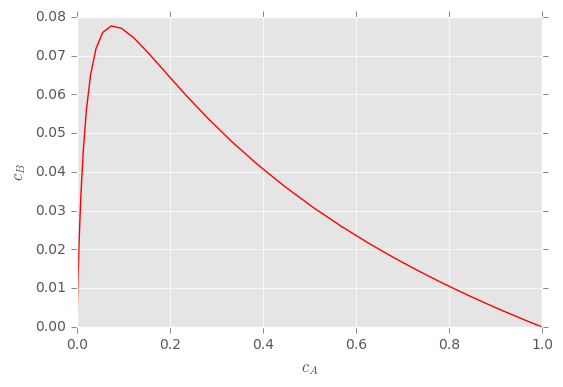

In [4]:
fig = plt.figure()
ax = fig.gca()

ax.plot(pfr_cs[:, 0], pfr_cs[:, 1], "r-")

ax.set_xlabel("$c_A$")
ax.set_ylabel("$c_B$")

plt.show(fig)